KHIZAR SAUD

# EU City Temperatures

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing/analysis

### Load the CSV file

In [8]:

filename = 'EuCitiesTemperatures.csv'
df = pd.read_csv(filename)
df


,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,NaN,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,NaN,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


### Fill in the missing latitude and longitude values

In [9]:

# Group the DataFrame by 'country' and calculate the mean of latitude and longitude
average_lat_long = df.groupby('country')[['latitude', 'longitude']].mean().round(2)

# Reset the index of the average_lat_long DataFrame
average_lat_long.reset_index(inplace=True)

# Merge the original DataFrame with the average_lat_long DataFrame to fill the missing values
df = df.merge(average_lat_long, on='country', how='left', suffixes=('', '_mean'))

# Fill missing latitude and longitude values with their respective averages
df['latitude'].fillna(df['latitude_mean'], inplace=True)
df['longitude'].fillna(df['longitude_mean'], inplace=True)

# Drop unnecessary columns
df.drop(columns=['latitude_mean', 'longitude_mean'], inplace=True)

# Save the modified DataFrame to a new Excel file
#df.to_excel('q1.xlsx', index=False)

### Find the subset of cities in latitudes 40 - 60 and longitudes 15 - 30


In [10]:
subset = df[(df['latitude'] >= 40) & (df['latitude'] <= 60) & (df['longitude'] >= 15) & (df['longitude'] <= 30)]

# Display the subset DataFrame in the Jupyter Notebook

#subset.to_excel('Question2excel.xlsx', index=False)


### Find the countries with a maximal number of such cities

In [11]:
import pandas as pd


# Count the number of cities in each country
city_count = subset['country'].value_counts()

# Find the maximal number of cities in the geographical band
max_cities = city_count.max()

# Get the countries with the maximal number of cities
max_countries = city_count[city_count == max_cities]

# Display the results
print(max_countries)

Romania    9
Poland     9
Name: country, dtype: int64


### Fill in the missing temperature values

In [13]:
import pandas as pd



# Make sure the categorical columns 'EU' and 'coastline' are correctly recognized
df['EU'] = df['EU'].astype('category')
df['coastline'] = df['coastline'].astype('category')

# Calculate the average temperature for each combination of 'EU' and 'coastline'
average_temperature = df.groupby(['EU', 'coastline'])['temperature'].mean()

# Fill the missing temperature values in the DataFrame using the average temperature of the respective group
df['temperature'] = df.groupby(['EU', 'coastline'])['temperature'].transform(lambda x: x.fillna(x.mean()))

# Verify the result by displaying the DataFrame
display(df)
#df.to_excel('qtemp.xlsx', index=False)

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.180000
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.481538
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.540000
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.910000
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.790000
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.314494
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.140000
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.000000
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.600000


## Visualization

### Bar chart of number of cities in each region

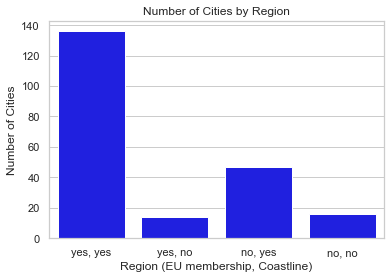

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
city_counts = df.groupby(['EU', 'coastline']).size().reset_index(name='count')
city_counts['region'] = city_counts['EU'].astype(str) + ', ' + city_counts['coastline'].astype(str)
ordered_regions = ["yes, yes", "yes, no", "no, yes", "no, no"]
city_counts['region'] = pd.Categorical(city_counts['region'], categories=ordered_regions, ordered=True)
city_counts = city_counts.sort_values('region')
sns.set(style="whitegrid")
barplot = sns.barplot(x='region', y='count', data=city_counts, color='blue')
plt.title("Number of Cities by Region")
plt.xlabel("Region (EU membership, Coastline)")
plt.ylabel("Number of Cities")
plt.xticks(range(len(city_counts['region'])), ordered_regions)

# Show the plot
plt.show()

### Scatter plot of cities' latitude/longitude

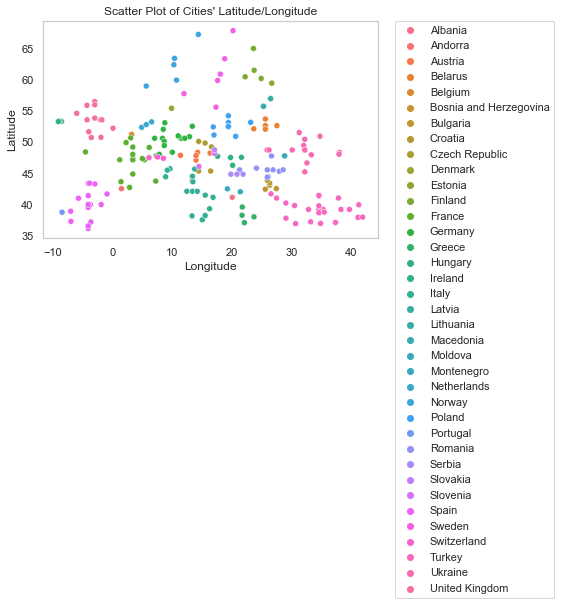

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Create a scatter plot using seaborn, color points based on their country
sns.set(style="whitegrid")
scatter_plot = sns.scatterplot(x='longitude', y='latitude', hue='country', data=df)

# Set plot title and labels
plt.title("Scatter Plot of Cities' Latitude/Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Remove gridlines
plt.grid(False)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.show()

### Histogram of country population

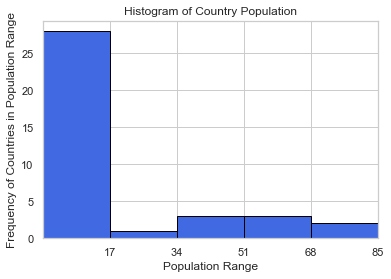

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove duplicate population values per country
unique_population_df = df[['country', 'population']].drop_duplicates()

# Create a histogram with 5 bins (population groups)
plt.hist(unique_population_df['population'], bins=5, range=(0, 85), color='royalblue', edgecolor='black', linewidth=1)

# Set plot title and labels
plt.title("Histogram of Country Population")
plt.xlabel("Population Range")
plt.ylabel("Frequency of Countries in Population Range")

# Customize x-axis ticks and labels
x_ticks = [17, 34, 51, 68, 85]
plt.xticks(x_ticks, [f'{tick:.0f}' for tick in x_ticks])

# Set lower and upper limits for x-axis
plt.xlim(0, 85)

# Show the plot
plt.show()

### Scatter plots of city vs latitude for each region

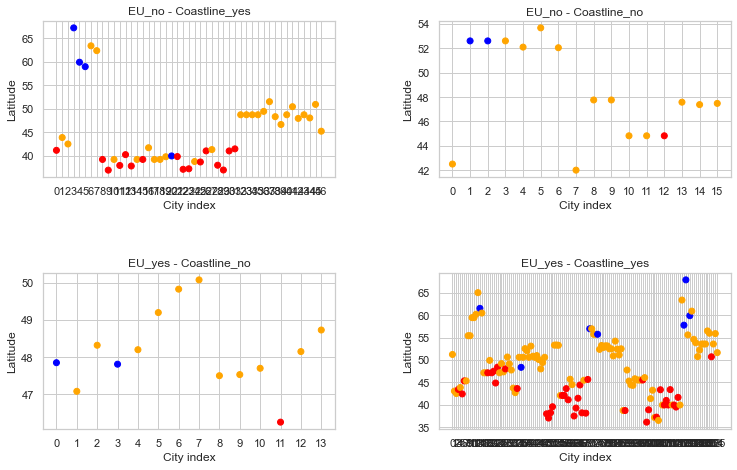

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Preprocessing for filling missing temperature values (assuming it has been done already)

# Create region types
df['region_type'] = df.apply(lambda row: f"EU_{row['EU']} - Coastline_{row['coastline']}", axis=1)

# Create a function to assign colors based on temperature
def assign_color(temperature):
    if temperature > 10:
        return 'red'
    elif temperature < 6:
        return 'blue'
    else:
        return 'orange'

# Assign colors to the DataFrame based on temperature
df['color'] = df['temperature'].apply(assign_color)

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.tight_layout(pad=6)

# List of unique region types
region_types = df['region_type'].unique()

# Plot each region type in the appropriate subplot
for i, ax in enumerate(axes.flatten()):
    region_df = df[df['region_type'] == region_types[i]]
    city_indices = np.arange(len(region_df))
    ax.scatter(city_indices, region_df['latitude'], c=region_df['color'], label=region_df['temperature'])
    ax.set_title(region_types[i])
    ax.set_xticks(city_indices)
    ax.set_xlabel('City index')
    ax.set_ylabel('Latitude')

# Show the plot
plt.show()